In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [70]:
biao1=r'D:\code\数学建模模版\数据集\竞赛发布数据\表1-患者列表及临床信息.xlsx'
biao2=r'D:\code\数学建模模版\数据集\竞赛发布数据\表2-患者影像信息血肿及水肿的体积及位置.xlsx'
biao11=pd.read_excel(biao1).iloc[:100,:]
biao21=pd.read_excel(biao2).iloc[:100,:]

In [71]:
p_temp=pd.DataFrame()
p_temp['止血治疗']=biao11['止血治疗']


In [72]:
filtered_cols = biao21.filter(regex='ED.*volume').columns
filtered_cols

Index(['ED_volume', 'ED_volume.1', 'ED_volume.2', 'ED_volume.3', 'ED_volume.4',
       'ED_volume.5', 'ED_volume.6', 'ED_volume.7', 'ED_volume.8'],
      dtype='object')

In [73]:
p_temp['H_前后变化']=biao21['HM_volume.1']-biao21['HM_volume']
p_temp

,止血治疗,H_前后变化
0,1,5188.0
1,1,4771.0
2,1,19646.0
3,1,-5621.0
4,1,9640.0
...,...,...
95,0,-84.0
96,1,1711.0
97,1,26495.0
98,1,20840.0


In [74]:
p_temp['E_前后变化']=biao21['ED_volume.1']-biao21['ED_volume']
p_temp

,止血治疗,H_前后变化,E_前后变化
0,1,5188.0,8979.0
1,1,4771.0,-136.0
2,1,19646.0,8671.0
3,1,-5621.0,-3235.0
4,1,9640.0,-24210.0
...,...,...,...
95,0,-84.0,143.0
96,1,1711.0,-1592.0
97,1,26495.0,-10861.0
98,1,20840.0,9864.0


In [75]:
list11=[]
list12=[]
list21=[]
list22=[]
j=0
for i in p_temp['止血治疗']:
    if i == 1:
        list11.append(p_temp['H_前后变化'][j])
        list21.append(p_temp['E_前后变化'][j])
        j+=1
    else:
        list12.append(p_temp['H_前后变化'][j])
        list22.append(p_temp['E_前后变化'][j])
        j+=1


<h2>箱型图</h2>

In [76]:
xbox_temp=pd.DataFrame()
xbox_temp['H_used']=pd.DataFrame(list11)
xbox_temp

,H_used
0,5188.0
1,4771.0
2,19646.0
3,-5621.0
4,9640.0
...,...
74,17507.0
75,1711.0
76,26495.0
77,20840.0


In [77]:
xbox_temp['H_unused']=pd.DataFrame(list12)


In [78]:
xbox_temp['3']=pd.DataFrame(list21)
xbox_temp['4']=pd.DataFrame(list22)
xbox_temp

,H_used,H_unused,3,4
0,5188.0,-23037.0,8979.0,-2119.0
1,4771.0,-729.0,-136.0,-12419.0
2,19646.0,297.0,8671.0,-1438.0
3,-5621.0,7294.0,-3235.0,11446.0
4,9640.0,-380.0,-24210.0,3244.0
...,...,...,...,...
74,17507.0,NaN,69650.0,NaN
75,1711.0,NaN,-1592.0,NaN
76,26495.0,NaN,-10861.0,NaN
77,20840.0,NaN,9864.0,NaN


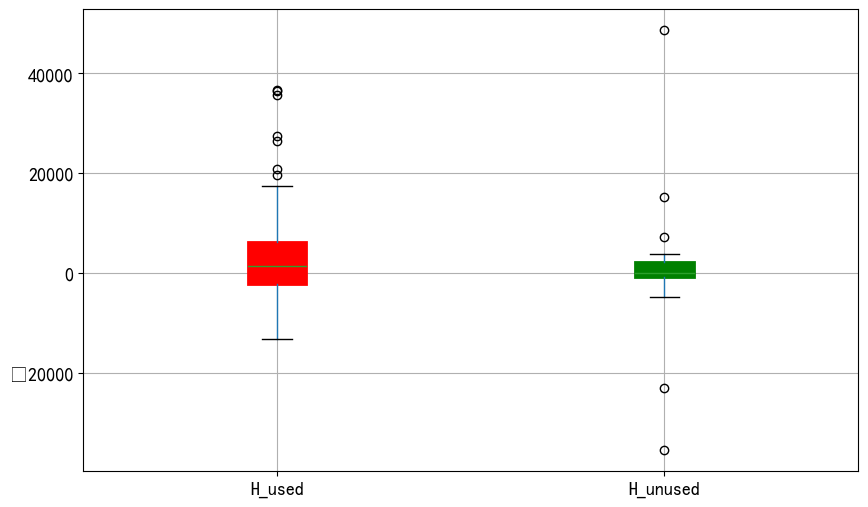

In [81]:
plt.figure(figsize=(10, 6))

boxprops = [{'edgecolor': 'red', 'facecolor': 'red'}, {'edgecolor': 'blue', 'facecolor': 'blue'}]
capprops = {'color': 'green'}


f = xbox_temp.iloc[:,:2].boxplot(patch_artist=True, return_type='dict')



colors = ['red', 'green']
for box,c in zip(f['boxes'], colors):
    # 箱体边框颜色
    box.set( color=c, linewidth=2)
    # 箱体内部填充颜色
    box.set( facecolor = c )
plt.show()


<Axes: >

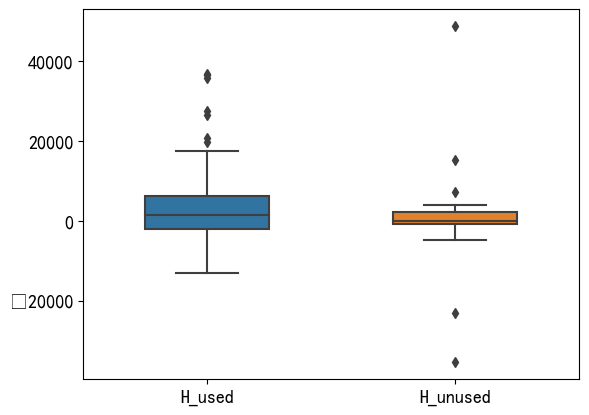

In [82]:
plt.title("HE_volume")
sns.boxplot(xbox_temp.iloc[:,:2],orient="v",width=0.5) 


<h2>1b数据汇总</h2>

In [129]:
import matplotlib.pyplot as plt
import io
import pyperclip
from PIL import Image
import base64

b_1="D:\code\数学建模模版\题1-b\predictions_log_noredu.txt"
p_1b=pd.read_csv(b_1, sep='\t')
p_1b



# # 假设有100个点的x坐标和y坐标数据
# x = [i for i in range(160)]
# y = [i**2 for i in range(160)]

# # 绘制折线图
# plt.plot(x, y)

# # 添加标题和坐标轴标签
# plt.title("折线图")
# plt.xlabel("X轴")
# plt.ylabel("Y轴")


,LGB
0,"0.02940,0.02130,0.81080,0.03110,0.71530,0.0163..."
1,XGB
2,"0.02900,0.02250,0.82950,0.03790,0.72120,0.0230..."
3,RF
4,"0.03000,0.08000,0.70000,0.08000,0.75000,0.1800..."
5,SVC
6,"0.22210,0.22350,0.21950,0.22210,0.21280,0.2224..."
7,MLP
8,"0.00190,0.00000,0.97800,0.00020,0.99760,0.0000..."


In [130]:
p_1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LGB     9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [131]:
list=[]
# list1=[]
# for i in range(5):
#     list.append(list1)
# data_list = data.split(",")
# data_list = [float(value) for value in data_list]
list

[]

In [132]:
data = "0.02940,0.02130,0.81080"

# 去掉逗号并将数值存储在列表中
data_list = data.split(",")
# data_list = [float(value) for value in data_list]

data_list

['0.02940', '0.02130', '0.81080']

In [133]:
list=[]
train=p_1b.iloc[:,0]
for i in range(5):
    data_list=train[i*2].split(",")
    data_list = [float(value) for value in data_list]
    list.append(data_list)
    


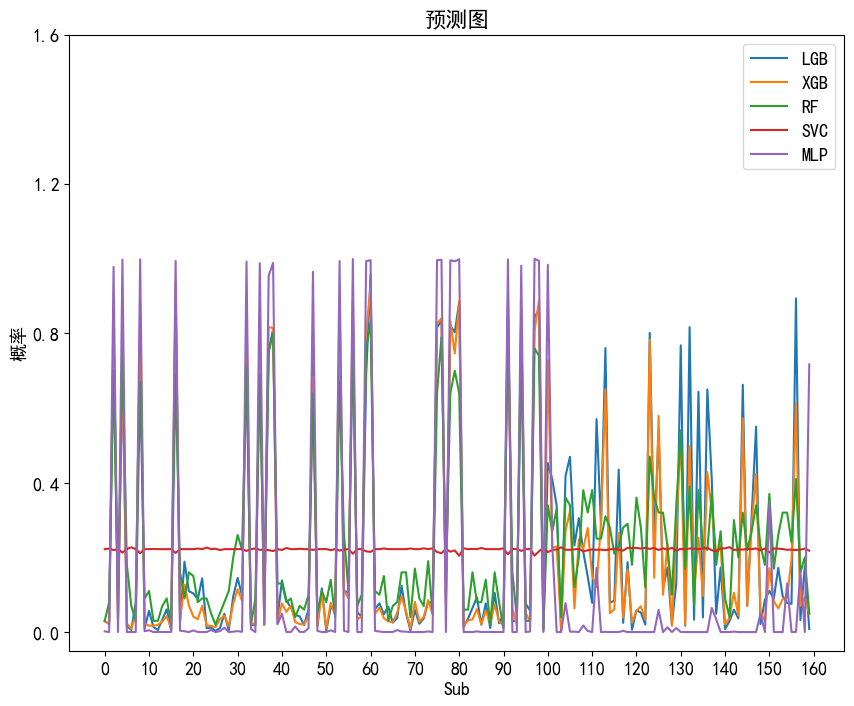

In [134]:
# 假设有100个点的x坐标和y坐标数据


x = [i for i in range(160)]
y1= list[0]
y2= list[1]
y3= list[2]
y4= list[3]
y5= list[4]
fig = plt.figure(figsize=(10,8))
# 绘制折线图
plt.plot(x, y1, label='LGB')
plt.plot(x, y2, label='XGB')
plt.plot(x, y3, label='RF')
plt.plot(x, y4, label='SVC')
plt.plot(x, y5, label='MLP')

plt.yticks(np.arange(0, 2, 0.4))
plt.xticks(np.arange(0, 170, 10))
plt.legend()
# 添加标题和坐标轴标签
plt.title("预测图")
plt.xlabel("Sub")
plt.ylabel("概率")


# 将图保存为文件对象
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# 将图像转换为 base64 编码的字符串
image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

# 将图像字符串复制到剪贴板
pyperclip.copy(image_data)

# 显示图表
plt.show()


<h2>重要性排序</h2>

In [181]:
c1=r"C:\Users\y\Desktop\a.txt"
z_temp=pd.read_csv(c1, sep='\t')
z_temp

,"X,Y"
0,"HM_r,0.120050"
1,"HM_S,0.113769"
2,"ED_r,0.108825"
3,"糖尿病史,0.078865"
4,"ED_S,0.078301"
5,"年龄,0.072717"
6,"ED_Ratio,0.067802"
7,"低压,0.065461"
8,"首次检查间隔,0.063707"
9,"HM_Ratio,0.058868"


In [182]:
list1=[]
list2=[]
train=z_temp.iloc[:,0]
for i in range(26):
    data_list=train[i].split(",")
    list1.append(data_list[0])
    list2.append(float(data_list[1]))
list=[]
list.append(list1)
list.append(list2)
df=pd.DataFrame(list)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,HM_r,HM_S,ED_r,糖尿病史,ED_S,年龄,ED_Ratio,低压,首次检查间隔,HM_Ratio,...,降颅压治疗,饮酒史,卒中病史,降压治疗,止血治疗,脑出血前mRS评分,房颤史,冠心病史,营养神经,止吐护胃
1,0.12005,0.113769,0.108825,0.078865,0.078301,0.072717,0.067802,0.065461,0.063707,0.058868,...,0.009842,0.008916,0.007218,0.006949,0.006349,0.004549,0.00363,0.003337,0.002781,0.000134


In [183]:
sorted_df = df.apply(lambda x: x.sort_values(ascending=False).values, axis=1).T
sorted_df.columns = df.columns
sorted_df

0    [高血压病史, 高压, 首次检查间隔, 饮酒史, 降颅压治疗, 降压治疗, 镇静治疗, 营养...
1    [0.12005, 0.113769, 0.108825, 0.078865, 0.0783...
dtype: object

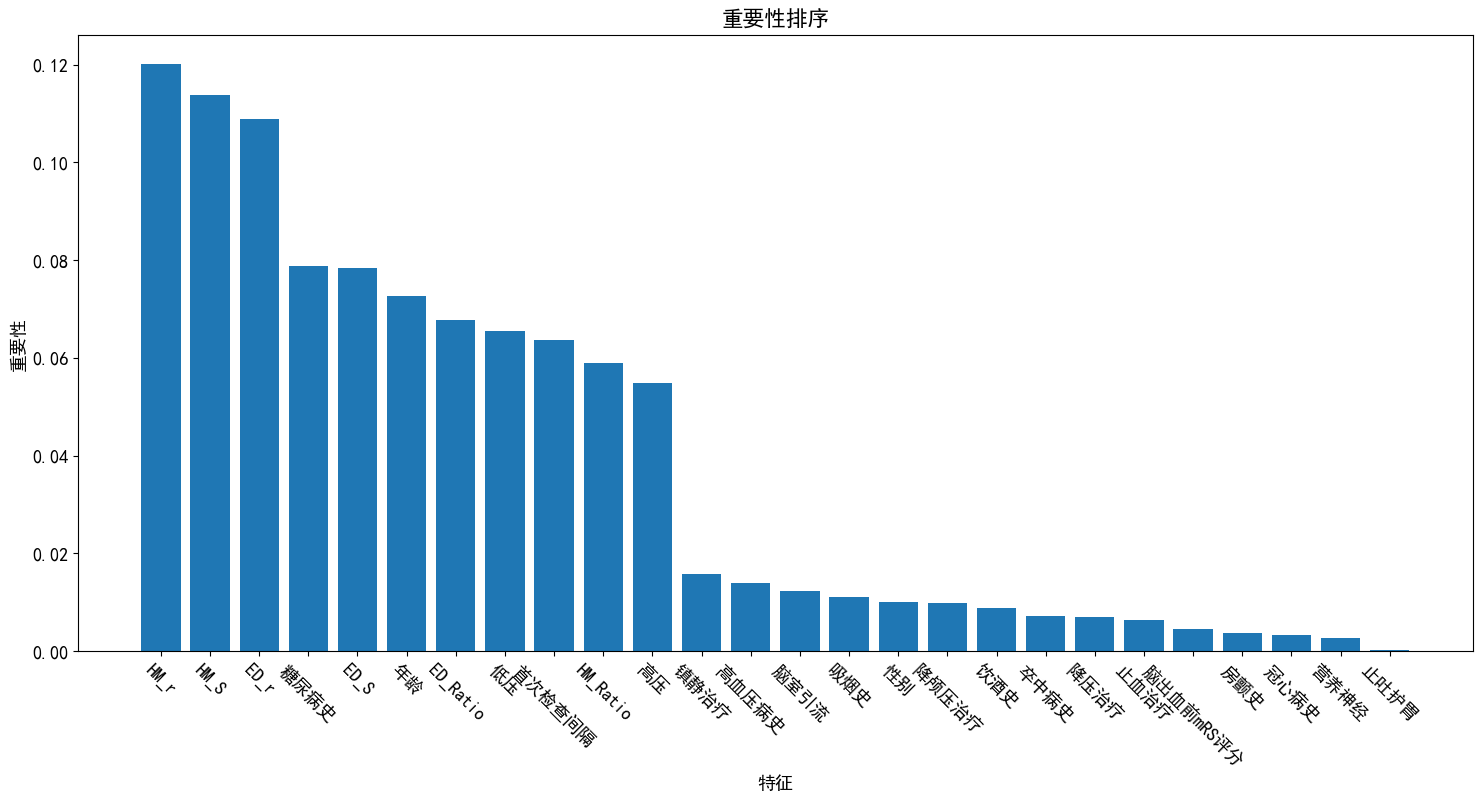

In [185]:
# 创建数据
x = df.iloc[0,:]  # x轴坐标
y = df.iloc[1,:]  # y轴坐标
fig = plt.figure(figsize=(18,8))
# 创建柱状图
plt.bar(x, y)
plt.xticks(rotation=-45) 
# 添加标签和标题
plt.xlabel('特征')
plt.ylabel('重要性')
plt.title('重要性排序')

buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# 将图像转换为 base64 编码的字符串
image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

# 将图像字符串复制到剪贴板
pyperclip.copy(image_data)

# 显示图形
plt.show()



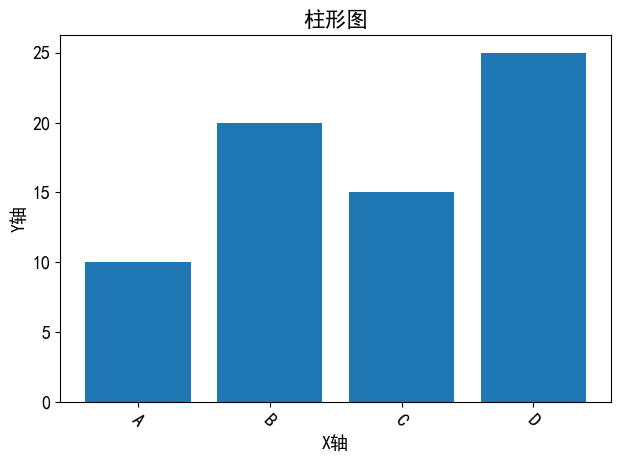

In [172]:
import matplotlib.pyplot as plt

# 示例数据
x = ['A', 'B', 'C', 'D']
y = [10, 20, 15, 25]

# 创建柱形图
plt.bar(x, y)

# 设置x轴标签和标题
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.title('柱形图')

# 设置x轴坐标点之间的间隔
plt.xticks(rotation=-45)  # 旋转x轴刻度标签
plt.tight_layout()  # 调整子图布局自动适应标签

# 显示图形
plt.show()